In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings('ignore')


In [2]:
data = pd.read_csv(
    r'C:\Cursos\Analise_de_dados\Cases\Mercado de Games\PS4_GamesSales.csv', encoding='latin-1')
data = data.dropna(subset='Year')
data['Year'] = pd.to_numeric(data['Year']).apply(lambda line: int((line)))


In [3]:
# ANALISE DE VENDAS POR GÊNERO
analise = data.groupby(by=['Genre']).sum()[
    ['North America', 'Europe', 'Japan', 'Rest of World', 'Global']].reset_index()


[]

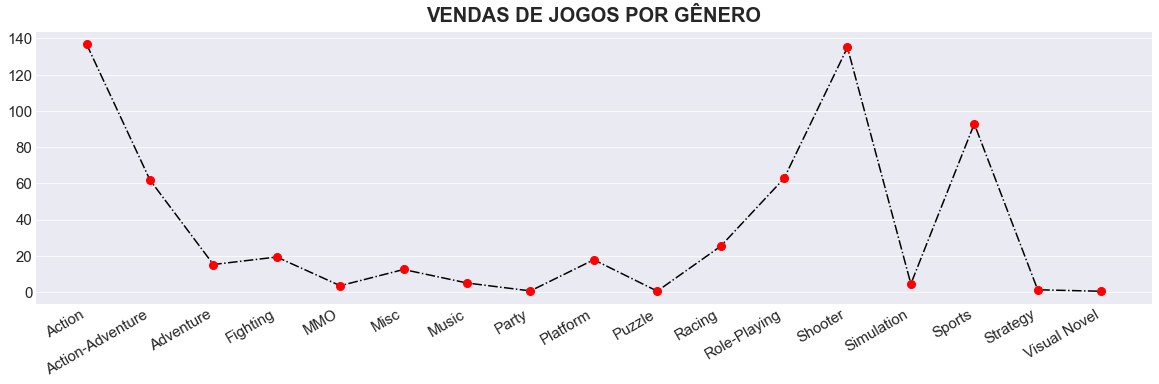

In [4]:
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(20, 5))
plt.grid(axis='x')
plt.title('VENDAS DE JOGOS POR GÊNERO', pad=10,
          fontdict={'size': 20, 'weight': 'bold'})
plt.plot(analise['Genre'], analise['Global'], color='black', marker='o', ms=8,
         mec='red', markerfacecolor='red', ls='-.')
plt.xticks(rotation=30, ha='right', size=15)
plt.yticks(size=15)
plt.plot()


[]

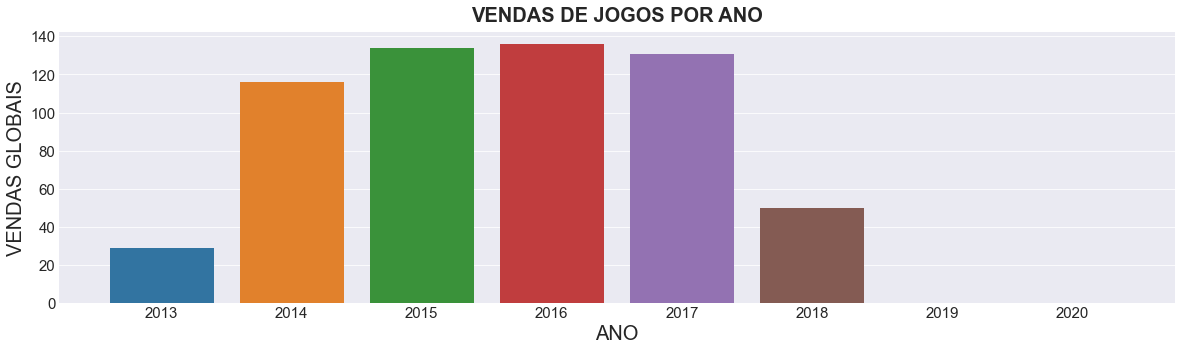

In [5]:
# ANALISE DE VENDAS DE JOGOS POR ANO
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(20, 5))
plt.grid(axis='x')
plt.title('VENDAS DE JOGOS POR ANO', pad=10,
          fontdict={'size': 20, 'weight': 'bold'})
sns.barplot(data=data, x='Year', y='Global', ci=None, estimator=sum)
plt.xticks(size=15,)
plt.xlabel('ANO', size=20)
plt.ylabel('VENDAS GLOBAIS', size=20)
plt.yticks(size=15)
plt.plot()


[]

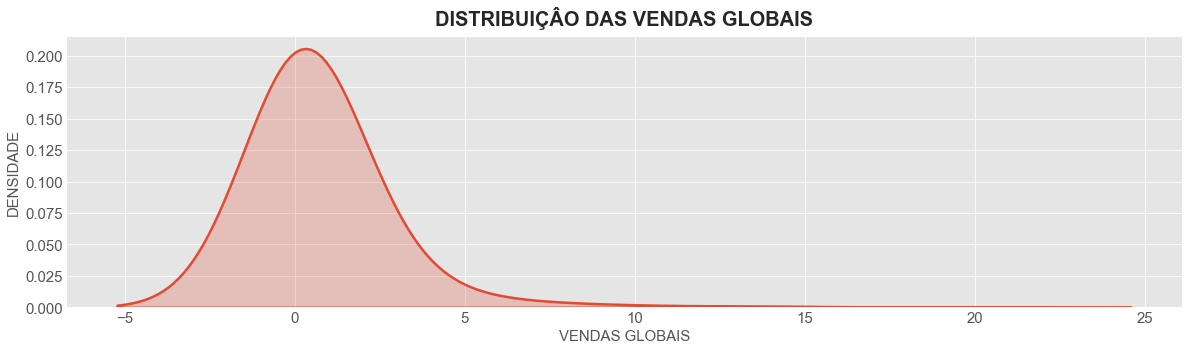

In [6]:
# ANALISE DAS DISTRIBUIÇÔES DAS VENDAS GLOBAIS
plt.figure(figsize=(20, 5))
plt.style.use('ggplot')
plt.title('DISTRIBUIÇÂO DAS VENDAS GLOBAIS', pad=10,
          fontdict={'size': 20, 'weight': 'bold'})
sns.kdeplot(data=data['Global'], shade=True,
            bw=1, linewidth=2.5)
plt.xticks(size=15,)
plt.xlabel('VENDAS GLOBAIS', size=15)
plt.ylabel('DENSIDADE', size=15)
plt.yticks(size=15)
plt.plot()


In [7]:
# DISTRIBUIÇÂO DAS VENDAS POR REGIÃO
analise2 = data.groupby(by=['Year']).sum(
)[['North America', 'Europe', 'Japan', 'Rest of World']]
analise2 = analise2.reset_index()
analise2 = analise2.loc[analise2['Year'] < 2019]


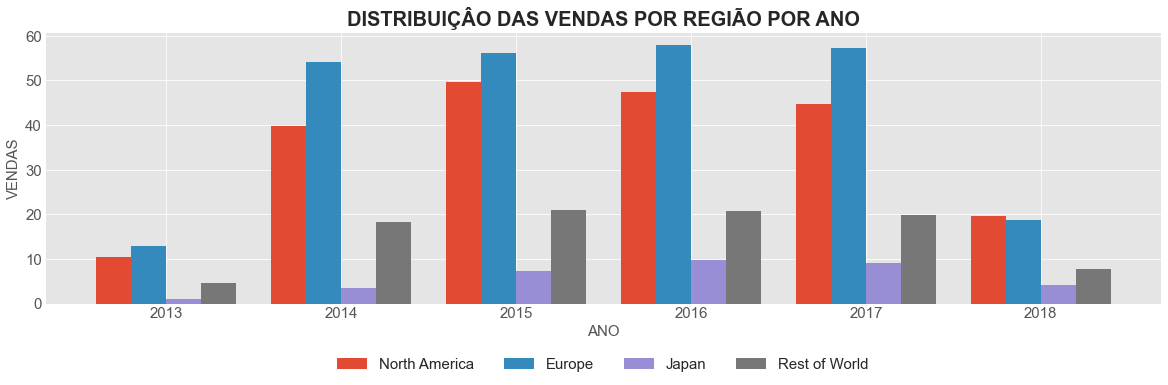

In [8]:
x = np.arange(len(analise2['Year']))
plt.figure(figsize=(20, 5))
plt.title('DISTRIBUIÇÂO DAS VENDAS POR REGIÃO POR ANO',
          fontdict={'weight': 'bold', 'size': 20})
plt.bar(x-0.3, analise2['North America'], width=0.2)
plt.bar(x-0.1, analise2['Europe'], width=0.2)
plt.bar(x+0.1, analise2['Japan'], width=0.2)
plt.bar(x+0.3, analise2['Rest of World'], width=0.2)
plt.xlabel("ANO", size=15)
plt.ylabel("VENDAS", size=15)
plt.legend(list(analise2.columns)[1:], fontsize=15,
           loc='best', bbox_to_anchor=(0.75, -0.15), ncol=4)
plt.xticks(x, list(analise2['Year']), size=15)
plt.yticks(size=15)
plt.show()


In [9]:
total = data.sum()['Global']
regioes = ['North America', 'Europe', 'Japan', 'Rest of World']
porcent = []
analise3 = data.sum()[regioes]
for i in analise3:
    porcent.append((i/total)*100)
analise3 = pd.DataFrame(list(zip(regioes, porcent)), columns=[
                        'Região', 'Porcentagem de Vendas'])
analise3['Porcentagem de Vendas'] = pd.to_numeric(
    analise3['Porcentagem de Vendas']).apply(lambda line: round(line, 2))
analise3


,Região,Porcentagem de Vendas
0,North America,35.53
1,Europe,43.17
2,Japan,5.83
3,Rest of World,15.46


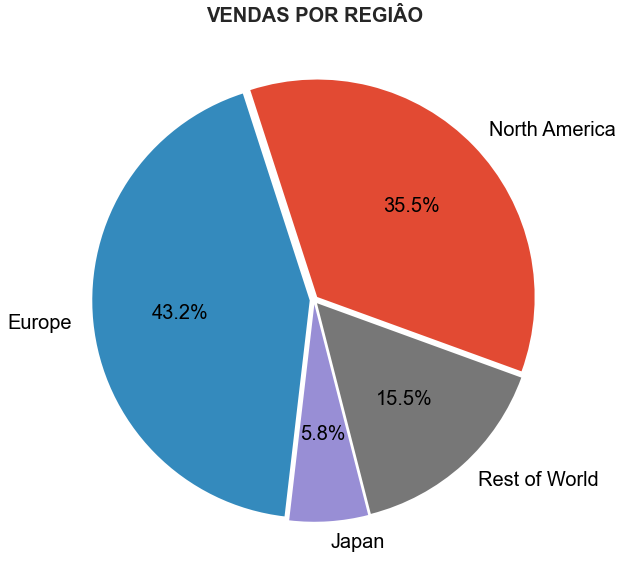

In [10]:
plt.figure(figsize=(20, 10))
plt.title('VENDAS POR REGIÂO', fontdict={'weight': 'bold', 'size': 20})
plt.pie(
    analise3['Porcentagem de Vendas'],
    labels=analise3['Região'],
    rotatelabels=False,
    wedgeprops={'linewidth': 25},
    startangle=-20,
    autopct='%.1f%%',
    explode=(0.02, 0.02, 0.02, 0.02),
    textprops={'color': 'black', 'size': 20})
plt.show()
